### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [4]:
date = '2018-10-23_14h07'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/' + date + '/'



## Throughput plot for read and write loads

In [5]:
# read data into pandas dataframe
df_w = pd.read_csv(base_path + 'two_servers_mem_tp.csv')
df_w

,client,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,4,5960.046667,4.771033,5399.843333,92.942134
1,8,5967.856667,0.823988,5850.006667,9.865459
2,16,5976.800000,43.363374,5848.666667,40.051967
3,32,5860.116667,28.398498,5870.883333,6.252596
4,48,5888.290000,4.081478,5853.300000,28.977240
5,64,5886.736667,6.062927,5849.420000,32.243706
6,80,5889.846667,7.343847,5897.160000,29.436869
7,96,5887.216667,7.228233,5886.333333,3.567579
8,112,5890.203333,6.845662,5888.870000,4.932687


In [6]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

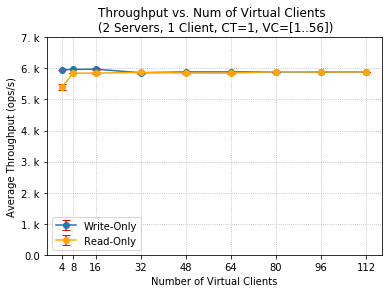

In [10]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (2 Servers, 1 Client, CT=1, VC=[1..56])")

vcs = df_w['client']

# write-only
tps = df_w['write_tp_mean']
std = df_w['write_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_w['read_tp_mean']
std = df_w['read_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=7000)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/two_servers_mem_tp.png", dpi = 150)

## Response-time plot for read and write loads

In [8]:
# read data into pandas dataframe
df_r = pd.read_csv(base_path + 'two_servers_mem_rt.csv')
df_r

,client,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,4,0.730000,0.000000,0.741667,0.014337
1,8,1.428333,0.015456,1.361667,0.002357
2,16,2.818333,0.010274,2.726667,0.002357
3,32,5.616667,0.010274,5.446667,0.006236
4,48,8.393333,0.044783,8.166667,0.006236
5,64,11.161667,0.006236,10.895000,0.007071
6,80,13.696667,0.002357,13.610000,0.004082
7,96,16.306667,0.018856,16.305000,0.010801
8,112,19.025000,0.024833,19.015000,0.014720


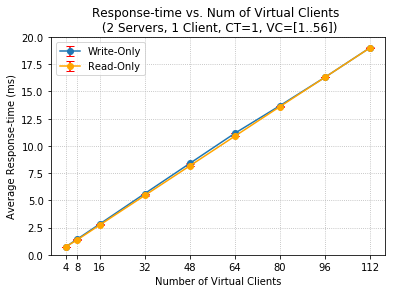

In [9]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (2 Servers, 1 Client, CT=1, VC=[1..56])")

vcs = df_r['client']

# write-only
tps = df_r['write_rt_mean']
std = df_r['write_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_r['read_rt_mean']
std = df_r['read_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/two_servers_mem_rt.png", dpi = 150)